In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import datasets

In [ ]:
pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/1

In [ ]:
import collections

import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

In [ ]:
seed=1234

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic=True

In [ ]:
train_data,test_data=datasets.load_dataset("imdb",split=["train","test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
train_data,test_data

(Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }))

In [ ]:
train_data.features


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [ ]:
train_data[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
tokenizer=torchtext.data.utils.get_tokenizer("basic_english")

In [ ]:
tokenizer("HELLO WORLD! HOW ARE YOU DOING TODAY? I'M DOING FANTASTIC")


['hello',
 'world',
 '!',
 'how',
 'are',
 'you',
 'doing',
 'today',
 '?',
 'i',
 "'",
 'm',
 'doing',
 'fantastic']

In [ ]:
def tokenize_example(example,tokenizer,max_length):
   tokens=tokenizer(example["text"])[:max_length]
   return {"tokens":tokens}

In [ ]:
max_length=256

train_data=train_data.map(tokenize_example, fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})
test_data=test_data.map(tokenize_example, fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['text', 'label', 'tokens'],
    num_rows: 25000
})

In [ ]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
train_data[0]["tokens"][:25]

['i',
 'rented',
 'i',
 'am',
 'curious-yellow',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 '.']

In [ ]:
test_size=0.25

train_valid_data=train_data.train_test_split(test_size=test_size)
train_data=train_valid_data["train"]
valid_data=train_valid_data["test"]


In [ ]:
len(train_data),len(valid_data),len(test_data)

(18750, 6250, 25000)

In [ ]:
min_freq=5
special_tokens=["<unk>","<pad>"]

vocab=torchtext.vocab.build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens
)

In [ ]:
len(vocab)

21635

In [ ]:
vocab.get_itos()[:10]

['<unk>', '<pad>', 'the', '.', ',', 'a', 'and', 'of', 'to', "'"]

In [ ]:
vocab["and"]

6

In [ ]:
unk_idx=vocab["<unk>"]
pad_idx=vocab["<pad>"]


In [ ]:
"some_token" in vocab

False

In [ ]:
vocab.set_default_index(unk_idx)

In [ ]:
vocab["some_token"]


0

In [ ]:
vocab.lookup_indices(["hello","world","<unk>","<pad>"])

[5516, 184, 0, 1]

In [ ]:
def numericalize_example(example,vocab):
   ids=vocab.lookup_indices(example["tokens"])
   return {"ids":ids}

In [ ]:
train_data=train_data.map(numericalize_example, fn_kwargs={"vocab":vocab})
valid_data=valid_data.map(numericalize_example, fn_kwargs={"vocab":vocab})
test_data=test_data.map(numericalize_example, fn_kwargs={"vocab":vocab})


Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
train_data[0]["tokens"][:10]

['look', ',', 'this', 'is', 'quite', 'possibly', 'one', 'of', 'the', 'best']

In [ ]:
vocab.lookup_indices(train_data[0]["tokens"][:10])

[180, 4, 14, 10, 191, 841, 34, 7, 2, 121]

In [ ]:
train_data[0]["ids"][:10]


[180, 4, 14, 10, 191, 841, 34, 7, 2, 121]

In [ ]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [ ]:
train_data=train_data.with_format(type="torch",columns=["ids","label"])
valid_data=valid_data.with_format(type="torch",columns=["ids","label"])
test_data=test_data.with_format(type="torch",columns=["ids","label"])

In [ ]:
train_data[0]["label"]

tensor(1)

In [ ]:
train_data[0]["ids"][:10]

tensor([180,   4,  14,  10, 191, 841,  34,   7,   2, 121])

In [ ]:
train_data[0].keys()

dict_keys(['label', 'ids'])

In [ ]:
vocab.lookup_tokens(train_data[0]["ids"][:10].tolist())

['look', ',', 'this', 'is', 'quite', 'possibly', 'one', 'of', 'the', 'best']

In [ ]:
def get_collate_fn(pad_idx):
   def collate_fn(batch):
      batch_ids=[i["ids"] for i in batch]
      batch_ids=nn.utils.rnn.pad_sequence(
        batch_ids,
        padding_value=pad_idx,
        batch_first=True
    )
      batch_label=[i["label"] for i in batch]
      batch_label=torch.stack(batch_label)
      batch={"ids":batch_ids,"label":batch_label}
      return batch
   return collate_fn

In [ ]:
def get_data_loader(dataset,batch_size,pad_idx,shuffle=False):
   collate_fn=get_collate_fn(pad_idx)
   dataloader=torch.utils.data.DataLoader(
       dataset=dataset,
       batch_size=batch_size,
       collate_fn=collate_fn,
       shuffle=shuffle
   )
   return dataloader

In [ ]:
batch_size=512

train_data_loader=get_data_loader(train_data,batch_size,pad_idx,shuffle=True)
valid_data_loader=get_data_loader(valid_data,batch_size,pad_idx)
test_data_loader=get_data_loader(test_data,batch_size,pad_idx)

In [ ]:
class NBoW(nn.Module):
   def __init__(self,vocab_size,embedding_dim,output_dim,pad_idx):
     super().__init__()
     self.embedding=nn.Embedding(vocab_size,embedding_dim,padding_idx=pad_idx)
     self.fc=nn.Linear(embedding_dim,output_dim)

   def forward(self,ids):
     embedded=self.embedding(ids)
     pooled=embedded.mean(dim=1)
     prediction=self.fc(pooled)
     return prediction





In [ ]:
vocab_size = len(vocab)
embedding_dim = 300
output_dim = len(train_data.unique("label"))

model = NBoW(vocab_size, embedding_dim, output_dim, pad_idx)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print(f"the model has {count_parameters(model):,} trainable paramters")

the model has 6,491,102 trainable paramters


In [ ]:
vectors=torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [06:01<00:00, 6068.17it/s]


In [ ]:
hello_vectors=vectors.get_vecs_by_tokens("hello")
hello_vectors.shape

torch.Size([300])

In [ ]:
hello_vectors[:32]

tensor([ 0.2523,  0.1018, -0.6748,  0.2112,  0.4349,  0.1654,  0.4826, -0.8122,
         0.0413,  0.7850, -0.0779, -0.6632,  0.1464, -0.2929, -0.2549,  0.0193,
        -0.2026,  0.9823,  0.0283, -0.0813, -0.1214,  0.1313, -0.1765,  0.1356,
        -0.1636, -0.2257,  0.0550, -0.2031,  0.2072,  0.0958,  0.2248,  0.2154])

In [ ]:
pretrained_embeddings=vectors.get_vecs_by_tokens(vocab.get_itos())

In [ ]:
pretrained_embeddings.shape

torch.Size([21635, 300])

In [ ]:
model.embedding.weight

Parameter containing:
tensor([[-0.1117, -0.4966,  0.1631,  ..., -0.5592, -0.4480, -0.6476],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.7882, -1.6625, -0.7064,  ..., -1.5841, -0.3711, -1.2338],
        ...,
        [-0.1833,  0.2245, -0.3846,  ..., -0.8093, -1.5803,  2.2097],
        [ 0.8763, -0.4503, -0.3297,  ...,  1.0524, -0.3182, -0.0381],
        [-0.7596,  0.6286,  0.0057,  ..., -0.8484, -0.1224,  1.3181]],
       requires_grad=True)

In [ ]:
model.embedding.weight.data=pretrained_embeddings

In [ ]:
model.embedding.weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1662,  0.2845,  0.4958,  ..., -0.5733, -0.4675, -0.0965],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2701,  0.6335,  0.2016,  ..., -0.4568,  0.5783, -0.5545]],
       requires_grad=True)

In [ ]:
optimizer=optim.Adam(model.parameters())

In [ ]:
criterion=nn.CrossEntropyLoss()

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
model=model.to(device)
criterion=criterion.to(device)


In [ ]:
def train(data_loader,model,criterion,optimizer,device):
  model.train()
  epoch_losses=[]
  epoch_accs=[]
  for batch in tqdm.tqdm(data_loader,desc="training"):
    ids=batch["ids"].to(device)
    label=batch["label"].to(device)
    prediction=model(ids)
    loss=criterion(prediction,label)
    accuracy=get_accuracy(prediction,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_losses.append(loss.item())
    epoch_accs.append(accuracy.item())
  return np.mean(epoch_losses),np.mean(epoch_accs)


In [ ]:
def evaluate(data_loader,model,criterion,device):
  model.eval()
  epochs_losses=[]
  epochs_accs=[]
  with torch.no_grad():
    for batch in tqdm.tqdm(data_loader,desc="evaluating......"):
      ids=batch["ids"].to(device)
      label=batch["label"].to(device)
      prediction=model(ids)
      loss=criterion(prediction,label)
      accuracy=get_accuracy(prediction,label)
      epochs_losses.append(loss.item())
      epochs_accs.append(accuracy.item())
    return np.mean(epochs_losses),np.mean(epochs_accs)

In [ ]:
def get_accuracy(prediction,label):
  batch_size,_=prediction.shape
  prediction_classes=prediction.argmax(dim=-1)
  correct_predictions=prediction_classes.eq(label).sum()
  accuracy=correct_predictions/batch_size
  return accuracy

In [ ]:
n_epochs=10
best_valid_loss=float("inf")
metrics=collections.defaultdict(list)

for epoch in range(n_epochs):
  train_loss,train_acc=train(train_data_loader,model,criterion,optimizer,device)
  valid_loss,valid_acc=evaluate(valid_data_loader,model,criterion,device)
  metrics["train_losses"].append(train_loss)
  metrics["train_accs"].append(train_acc)
  metrics["valid_losses"].append(valid_loss)
  metrics["valid_accs"].append(valid_acc)
  if valid_loss<best_valid_loss:
    best_valid_loss=valid_loss
    torch.save(model.state_dict(),"nbow.pt")
  print(f"epoch:{epoch}")
  print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
  print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]


epoch:0
train_loss: 0.678, train_acc: 0.638
valid_loss: 0.659, valid_acc: 0.725


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  6.22it/s]


epoch:1
train_loss: 0.633, train_acc: 0.738
valid_loss: 0.606, valid_acc: 0.755


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  4.88it/s]


epoch:2
train_loss: 0.569, train_acc: 0.776
valid_loss: 0.542, valid_acc: 0.782


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  6.41it/s]


epoch:3
train_loss: 0.497, train_acc: 0.817
valid_loss: 0.477, valid_acc: 0.822


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  5.36it/s]


epoch:4
train_loss: 0.432, train_acc: 0.850
valid_loss: 0.427, valid_acc: 0.843


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  6.44it/s]


epoch:5
train_loss: 0.379, train_acc: 0.872
valid_loss: 0.393, valid_acc: 0.850


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  5.23it/s]


epoch:6
train_loss: 0.339, train_acc: 0.885
valid_loss: 0.364, valid_acc: 0.862


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  6.06it/s]


epoch:7
train_loss: 0.306, train_acc: 0.896
valid_loss: 0.345, valid_acc: 0.867


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  6.32it/s]


epoch:8
train_loss: 0.279, train_acc: 0.906
valid_loss: 0.329, valid_acc: 0.873


evaluating......: 100%|██████████| 13/13 [00:02<00:00,  6.38it/s]


epoch:9
train_loss: 0.257, train_acc: 0.914
valid_loss: 0.318, valid_acc: 0.878


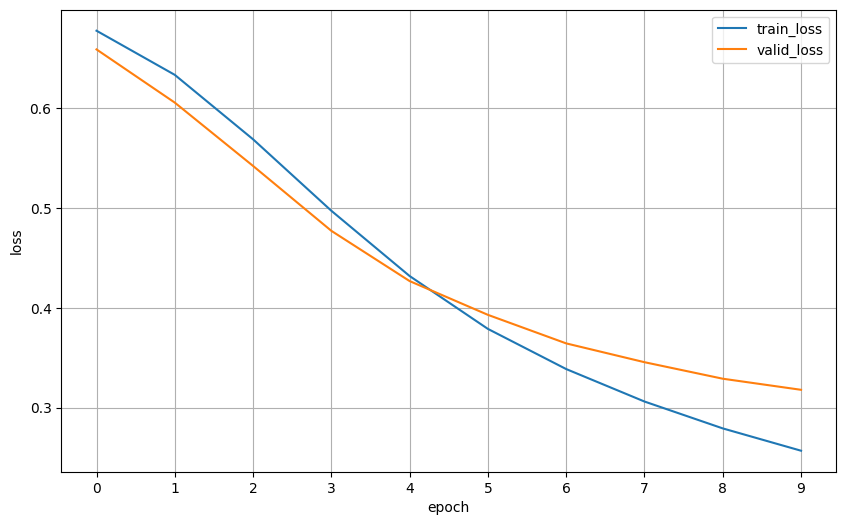

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.plot(metrics["train_losses"],label="train_loss")
ax.plot(metrics["valid_losses"],label="valid_loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

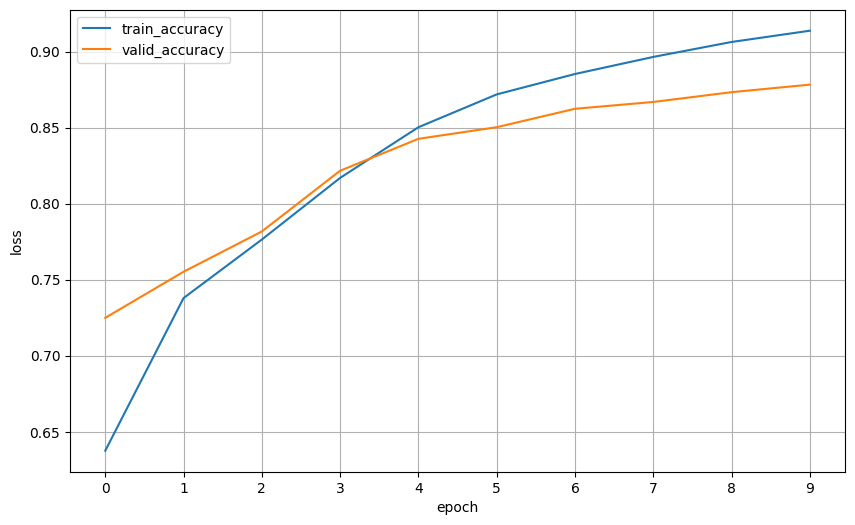

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.plot(metrics["train_accs"],label="train_accuracy")
ax.plot(metrics["valid_accs"],label="valid_accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

In [ ]:
model.load_state_dict(torch.load("nbow.pt"))

test_loss,test_acc=evaluate(test_data_loader,model,criterion,device)


evaluating......: 100%|██████████| 49/49 [00:09<00:00,  5.30it/s]


In [ ]:
print(f"test loss:{test_loss:.3f},test accuracy:{test_acc:.3f}")

test loss:0.352,test accuracy:0.858


In [ ]:
def predict_sentiment(text,model,tokenizer,vocab,device,class_labels):
  tokens=tokenizer(text)
  ids=vocab.lookup_indices(tokens)
  tensor=torch.LongTensor(ids).unsqueeze(dim=0).to(device)
  prediction=model(tensor).squeeze(dim=0)
  probability=torch.softmax(prediction,dim=-1)
  predicted_class=prediction.argmax(dim=-1).item()
  predicted_probability=probability[predicted_class,].item()
  predicted_label=class_labels[predicted_class]
  return predicted_class,predicted_label,predicted_probability


In [ ]:
class_labels = ["negative", "positive"]


In [ ]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, vocab, device,class_labels)

(0, 'negative', 0.9999827146530151)

In [ ]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, vocab, device,class_labels)

(1, 'positive', 0.9999996423721313)

In [ ]:
text = "This film is not terrible, it's great!"

predict_sentiment(text, model, tokenizer, vocab, device,class_labels)

(1, 'positive', 0.717515230178833)

In [ ]:
text = "This film is not great, it's terrible"

predict_sentiment(text, model, tokenizer, vocab, device,class_labels)

(1, 'positive', 0.5317190885543823)